## Import Libraries

In [4]:
import sqlite3  # To connect and run SQL
import pandas as pd  # For working with data as tables
import matplotlib.pyplot as plt  # For bar charts


# Create SQLite Database

In [5]:
# Create a new database file (or connect if it already exists)
conn = sqlite3.connect("tata1mg_sales.db")
cursor = conn.cursor()

## Create the Sales Table

In [6]:
# Create table if not already there
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL,
    sales_date TEXT
)
''')
conn.commit()


In [7]:
# This step deletes existing data if re-running the notebook
cursor.execute("DELETE FROM sales")
conn.commit()

#Insert Sample Data

In [8]:
data = [
    ("Paracetamol", 20, 12.0, "2024-06-01"),
    ("Dolo-650", 15, 16.5, "2024-06-01"),
    ("Insulin", 5, 400.0, "2024-06-02"),
    ("Crocin", 10, 10.0, "2024-06-03"),
    ("Dolo-650", 12, 16.5, "2024-06-04"),
    ("Paracetamol", 30, 11.5, "2024-06-04"),
    ("Insulin", 4, 420.0, "2024-06-05")
]

cursor.executemany("INSERT INTO sales (product, quantity, price, sales_date) VALUES (?, ?, ?, ?)", data)
conn.commit()


# Query 1: Total Revenue

In [9]:
query = '''
SELECT SUM(quantity * price) AS total_revenue
FROM sales
'''
df = pd.read_sql_query(query, conn)
print(df)


   total_revenue
0         4810.5


# Query 2: Total Quantity Sold per Product

In [10]:
query = '''
SELECT product, SUM(quantity) AS total_quantity_sold
FROM sales
GROUP BY product
'''
df = pd.read_sql_query(query, conn)
print(df)


       product  total_quantity_sold
0       Crocin                   10
1     Dolo-650                   27
2      Insulin                    9
3  Paracetamol                   50


# Plot: Quantity Sold per Product

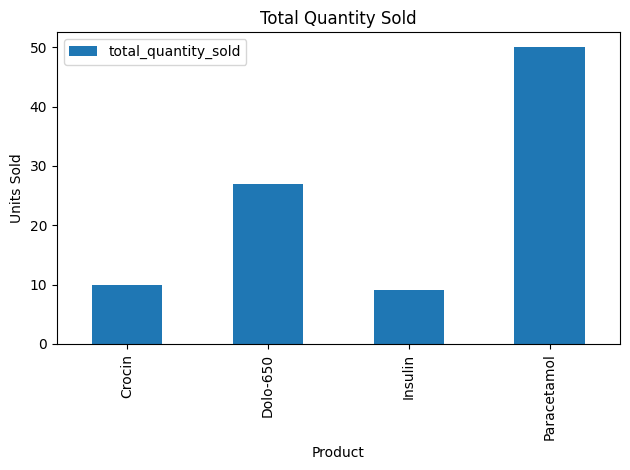

In [11]:
df.plot(kind='bar', x='product', y='total_quantity_sold', title='Total Quantity Sold')
plt.xlabel("Product")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()


# Total Revenue by Product

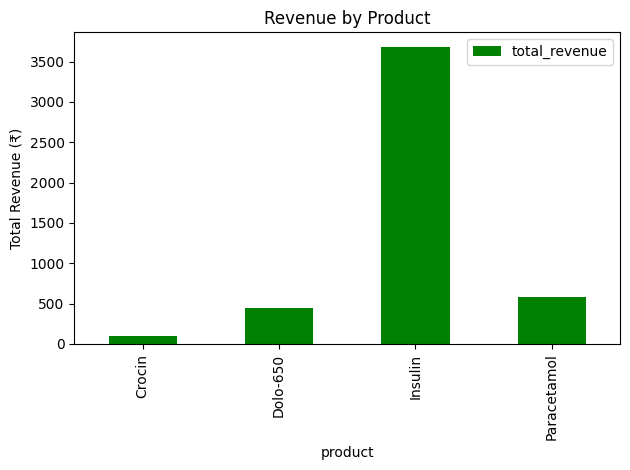

In [12]:
query = '''
SELECT product, SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product
'''
df = pd.read_sql_query(query, conn)


# Bar chart
df.plot(kind='bar', x='product', y='total_revenue', title='Revenue by Product', color='green')
plt.ylabel("Total Revenue (₹)")
plt.tight_layout()
plt.show()


In [13]:
conn.close()